## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [99]:
#pip install sklearn

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from plotnine import *


In [9]:
#import dataset
df = pd.read_csv('ha_1.csv')
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
# X=df[['age','chol']]
# y=df['diagnosis']
# log_pipeline = Pipeline([
#     ("log", LogisticRegression())
# ])

# coef1 = log_pipeline.fit(X, y).named_steps["log"].coef_[0][0]
# coef2 = log_pipeline.fit(X, y).named_steps["log"].coef_[0][1]

# intercept = log_pipeline.fit(X, y).named_steps["log"].intercept_[0]
# print(intercept)

# n=.9
# age =55
# log1 = n/(1-n)

# #intercept + 3 * age(55) + 4* chol(1588) = log-odds (90%)
# pred= intercept + coef1*age
# print(pred)
# log1*pred


In [97]:
X=df[['age','chol']]
y=df['diagnosis']
age = 55

In [96]:
log_pipeline = Pipeline([
    ("log", LogisticRegression())
])

In [103]:
log_intercept = log_pipeline.fit(X, y).named_steps["log"].intercept_[0]
log_coef_age = log_pipeline.fit(X, y).named_steps["log"].coef_[0][0]
log_coef_chol = log_pipeline.fit(X, y).named_steps["log"].coef_[0][1]
print(f"Intercept: {intercept}")
print(f"Coefficient for Age: {coef_age}")
print(f"Coefficient for Cholesterol: {coef_chol}")

Intercept: -3.2196776604068784
Coefficient for Age: 0.04655743553694484
Coefficient for Cholesterol: 0.0017896671039291314


In [104]:
def find_chol(age, probability, intercept, coef_age, coef_chol):
    log_odds = np.log(probability / (1 - probability))
    chol = (log_odds - intercept - coef_age * age) / coef_chol
    return chol

In [105]:
age = 55
chol_90 = find_chol(age, 0.9, intercept, coef_age, coef_chol)

print(f"For a 55-year-old:")
print(f"Cholesterol level for 90% probability of heart disease: {chol_90:.2f}")

For a 55-year-old:
Cholesterol level for 90% probability of heart disease: 1595.96


In [106]:
#for a 50 year old
age = 50
chol_90 = find_chol(age, 0.9, intercept, coef_age, coef_chol)

print(f"For a 50-year-old:")
print(f"Cholesterol level for 90% probability of heart disease: {chol_90:.2f}")

For a 50-year-old:
Cholesterol level for 90% probability of heart disease: 1726.04


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [111]:
#lda pipeline
lda_pipeline = Pipeline([
    ("lda", LinearDiscriminantAnalysis())
])


lda_pipeline.fit(X, y)
#coeff
lda = lda_pipeline.named_steps["lda"]
lda_coef_age = lda.coef_[0][0]
lda_coef_chol = lda.coef_[0][1]
lda_intercept = lda.intercept_[0]

print(f"LDA Intercept: {lda_intercept}")
print(f"Coefficient for Age: {lda_coef_age}")
print(f"Coefficient for Cholesterol: {lda_coef_chol}")

LDA Intercept: -3.2196776604068784
Coefficient for Age: 0.04655743553694484
Coefficient for Cholesterol: 0.0017896671039291314


In [115]:
def find_chol_lda(age, probability, intercept, coef_age, coef_chol):
    # Calculate log-odds for the given probability *chat helped
    log_odds = np.log(probability / (1 - probability))
    # Find cholesterol level
    chol = (log_odds - intercept - coef_age * age) / coef_chol
    return chol

In [116]:
chol_50_lda = find_chol_lda(55, 0.5, lda_intercept, lda_coef_age, lda_coef_chol)

print(f"For a 55-year-old:")
print(f"Cholesterol level for 50% probability of heart disease: {chol_50_lda:.2f}")

For a 55-year-old:
Cholesterol level for 50% probability of heart disease: 368.24


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [108]:
X = df[['age', 'chol']]
y = df['diagnosis']

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

svc_pipeline = Pipeline(
    [("preprocessing", ct),
     ("svc", SVC(kernel='linear', probability = True))]
).set_output(transform="pandas")

svc_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d0c162c7e20>)])),
                ('svc', SVC(kernel='linear', probability=True))])

In [81]:
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5)

grid_search.fit(X, y)

# Best model
best_svc = grid_search.best_estimator_.named_steps["svc"]
best_svc

SVC(C=0.1, kernel='linear', probability=True)

In [117]:
svc_coef_age = best_svc.coef_[0][0]
svc_coef_chol = best_svc.coef_[0][1]
svc_intercept = best_svc.intercept_[0]

In [88]:
from logging import log
p= .5
log_odds = np.log(p/(1-p))
log_odds

0.0

In [92]:
pred_svc=(svc_intercept[0] + svc_coef[0][0] *55 - log_odds)/-svc_coef[0][1]
pred_svc

312.69049430633044

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

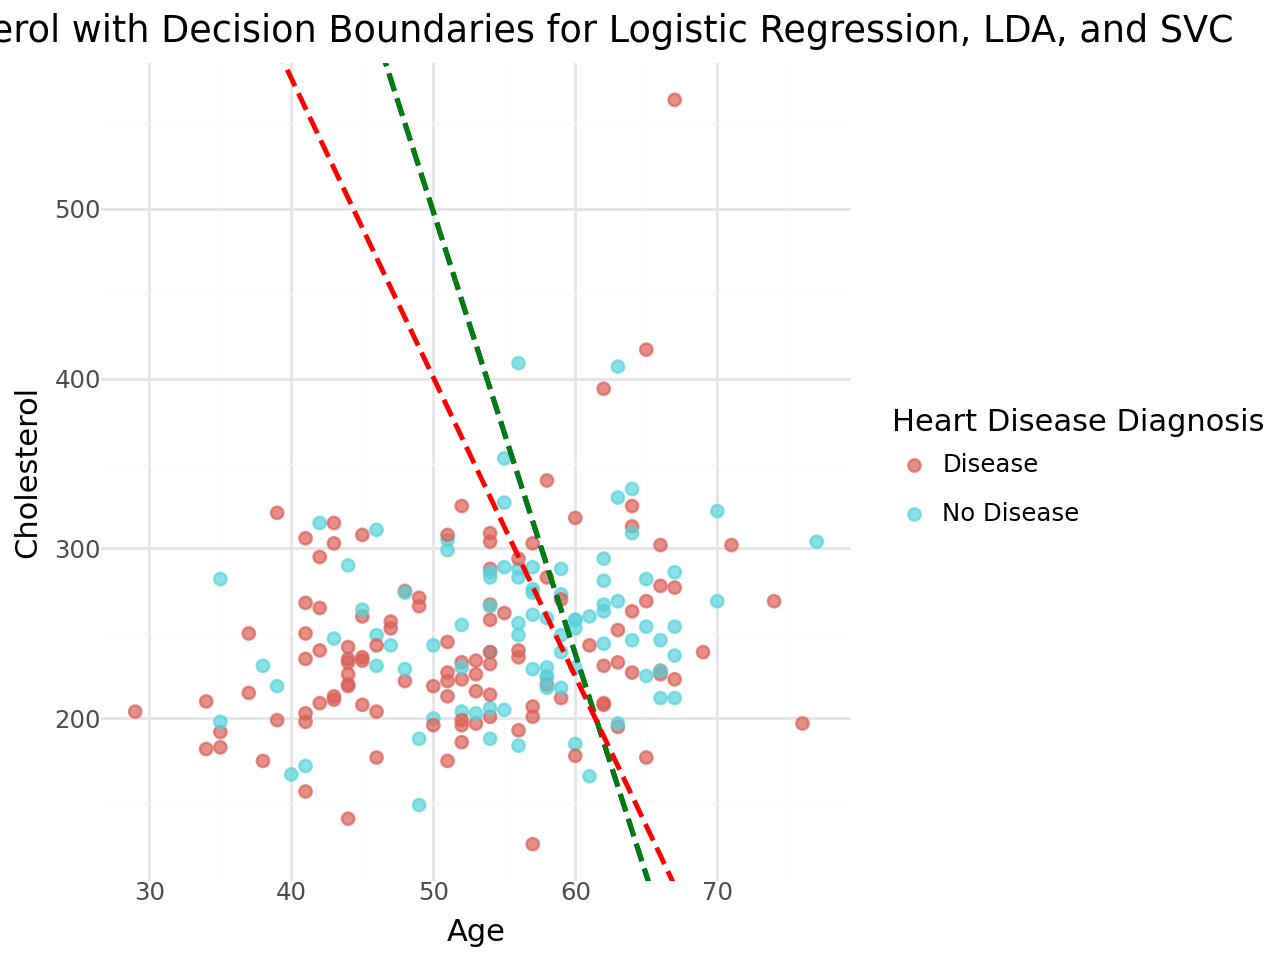

In [118]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_abline, labs, theme_minimal

# coefficients from the log model
log_intercept = log_pipeline.fit(X, y).named_steps["log"].intercept_[0]
log_coef_age = log_pipeline.fit(X, y).named_steps["log"].coef_[0][0]
log_coef_chol = log_pipeline.fit(X, y).named_steps["log"].coef_[0][1]

#coefficients from LDA
lda_coef_age = lda.coef_[0][0]
lda_coef_chol = lda.coef_[0][1]
lda_intercept = lda.intercept_[0]

# coefficients from SVC
svc_coef_age = best_svc.coef_[0][0]
svc_coef_chol = best_svc.coef_[0][1]
svc_intercept = best_svc.intercept_[0]
#chat helped
# Create a range of ages for plotting decision boundaries
age_range = np.linspace(df['age'].min(), df['age'].max(), 100)

# Calculate the decision boundaries for each model
logreg_chol_boundary = -(log_intercept + log_coef_age * age_range) / log_coef_chol
lda_chol_boundary = -(lda_intercept + lda_coef_age * age_range) / lda_coef_chol
svc_chol_boundary = -(svc_intercept + svc_coef_age * age_range) / svc_coef_chol

# Create the plot
plot = (
    ggplot(df, aes(x='age', y='chol', color='factor(diagnosis)'))
    + geom_point(size=2, alpha=0.7)  # Scatterplot of age vs. cholesterol
    + geom_abline(slope=-log_coef_age/log_coef_chol, intercept=-log_intercept/log_coef_chol, linetype='dashed', color='blue', size=1)  # Logistic Regression boundary
    + geom_abline(slope=-lda_coef_age/lda_coef_chol, intercept=-lda_intercept/lda_coef_chol, linetype='dashed', color='green', size=1)  # LDA boundary
    + geom_abline(slope=-svc_coef_age/svc_coef_chol, intercept=-svc_intercept/svc_coef_chol, linetype='dashed', color='red', size=1)  # SVC boundary
    + labs(title="Age vs Cholesterol with Decision Boundaries for Logistic Regression, LDA, and SVC",
           x="Age",
           y="Cholesterol",
           color="Heart Disease Diagnosis")
    + theme_minimal()
)

# Show the plot
plot
